# Analyze a collection of EDI files (MT Survey)

## import modules

In [3]:
import os
import sys
import glob

import pandas as pdJ
import numpy as np
import scipy
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300

from mtpy.core.edi_collection import EdiCollection


In [ ]:
edidir='E:/Data/MT_Datasets/GA_UA_edited_10s-10000s'
edidir='E:/Data/MT_Datasets/WenPingJiang_EDI'

edifiles = glob.glob(edidir + '/*.edi')

assert len(edifiles) > 0  # must has edi files

obj = EdiCollection(edifiles)


In [ ]:
select_period=obj.get_periods_by_stats(percentage=20.0)

In [ ]:
type(obj.mt_periods)

In [ ]:

stats.describe(obj.mt_periods)

In [ ]:
plt.hist(obj.mt_periods,bins=obj.all_unique_periods)
plt.title("Histogram with uniq_periods bins")
plt.xlabel("Periods")
plt.ylabel("Occurence in number of MT stations")

In [ ]:

y,binEdges = np.histogram(obj.mt_periods,bins=1000)

bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

plt.bar(bincenters, y, width=0.05, color='r')
plt.show()

In [21]:
y

array([5787,  269,  176,  118,  136,  126,  138,    2,  137,    0,  137,
          2,    0,  138,    0,    0,    0,  136,    0,    0,    4,    0,
        134,    0,    0,    2,    2,  129,    0,    0,    0,    3,    0,
          0,  133,    1,    0,    0,    0,    0,    2,  133,    0,    0,
          0,    3,    0,    0,    0,    0,    0,    0,    0,  131,    0,
          3,    0,    0,    0,    0,    0,    0,    0,  110,    0,    0,
          0,    0,    4,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,  126,    0,    3,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    3,    0,    0,
          0,  119,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,  112,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    4,   

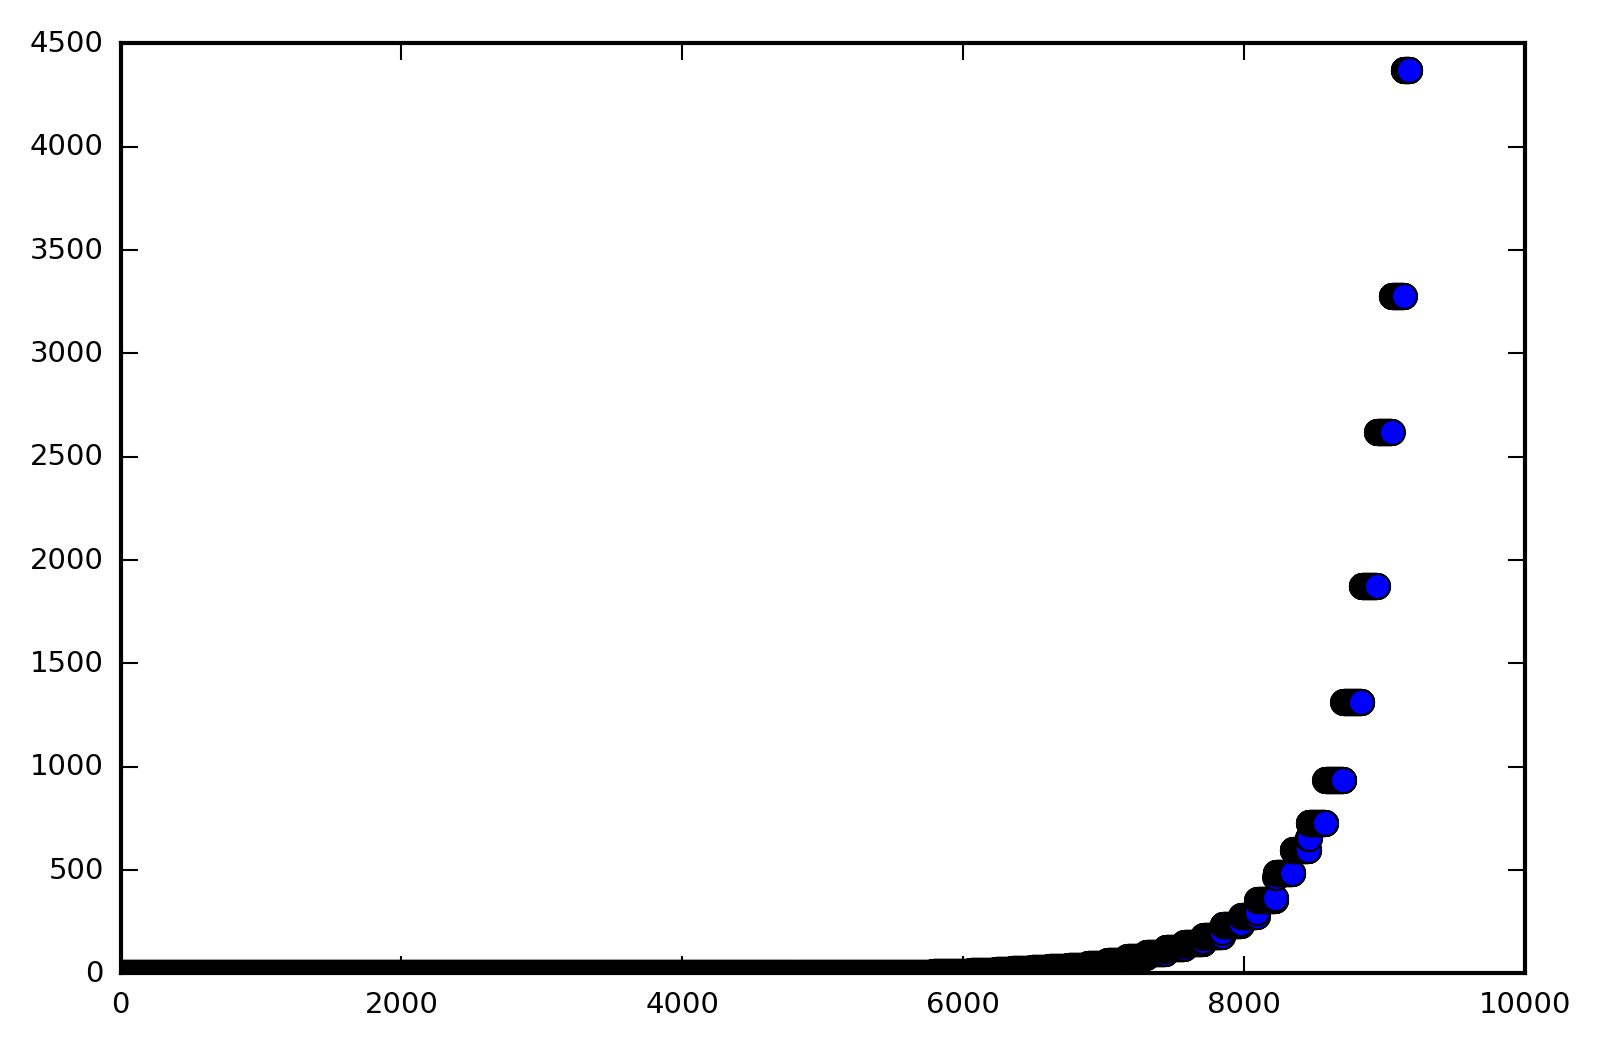

In [24]:
plt.plot(obj.mt_periods,"o")

In [7]:

perc=np.percentile(obj.mt_periods, 90.0)

perc

485.46045924559445

In [8]:
print obj.mt_periods.sort()

None


In [9]:
 pdser=pd.Series(obj.mt_periods)

In [10]:
print(pdser.quantile(0.90))

485.460459246


In [11]:
pdser.describe()

count    9180.000000
mean      182.803508
std       573.571078
min         0.000080
25%         0.007314
50%         0.522439
75%        37.237014
max      4369.101713
dtype: float64

# modem input

In [12]:
import mtpy.modeling.modem as modem

outdir=r"E:/tmp/modem_inv1"
#1) make a list of all .edi files that will be inverted for 

md = modem.Data(edi_list=edifiles, 
                period_list=np.array(select_period),
                epsg=3112,
                error_type='floor',
                error_floor=5)


md.write_data_file(save_path=outdir)


If you want to write a vtk file for 3d viewing, you need download and install evtk from https://bitbucket.org/pauloh/pyevtk
Note: if you are using Windows you should build evtk first witheither MinGW or cygwin using the command: 
    python setup.py build -compiler=mingw32  or 
    python setup.py build -compiler=cygwin
If you want to write a vtk file for 3d viewing, you need download and install evtk from https://bitbucket.org/pauloh/pyevtk
Note: if you are using Windows you should build evtk first witheither MinGW or cygwin using the command: 
    python setup.py build -compiler=mingw32  or 
    python setup.py build -compiler=cygwin
--------------------------------------------------
('Inverting for these periods:', 94)
     0.056889    
     0.024381    
     0.017356    
     0.013474    
     0.037926    
     0.227557    
     0.009846    
     0.000162    
     0.000103    
     0.000080    
     37.237014   
     0.000127    
     58.513751   
     45.510399   
     30.340726  

make_mesh(): writing data file


E:\Githubz\mtpy2\mtpy\modeling\modem.py:1975: FutureWarning: Numpy has detected that you (may be) writing to an array returned
by numpy.diagonal or by selecting multiple fields in a structured
array. This code will likely break in a future numpy release --
see numpy.diagonal or arrays.indexing reference docs for details.
The quick fix is to make an explicit copy (e.g., do
arr.diagonal().copy() or arr[['f0','f1']].copy()).
  self.station_locations['rel_east'] += np.mean(east_gridr)


Wrote ModEM data file to E:\tmp\modem_inv1\ModEM_Data_2.dat
---------------
   Number of stations = 138
   Dimensions: 
      e-w = 3591
      n-s = 2358
       z  = 31 (including air layers: 0)
   Extensions: 
      e-w = 364200.0 (m)
      n-s = 482000.0 (m)
      0-z = 162215.0 (m)
  Stations rotated by: 0.0 deg clockwise positive from N

 ** Note ModEM does not accommodate mesh rotations, it assumes
    all coordinates are aligned to geographic N, E
    therefore rotating the stations will have a similar effect
    as rotating the mesh.
---------------


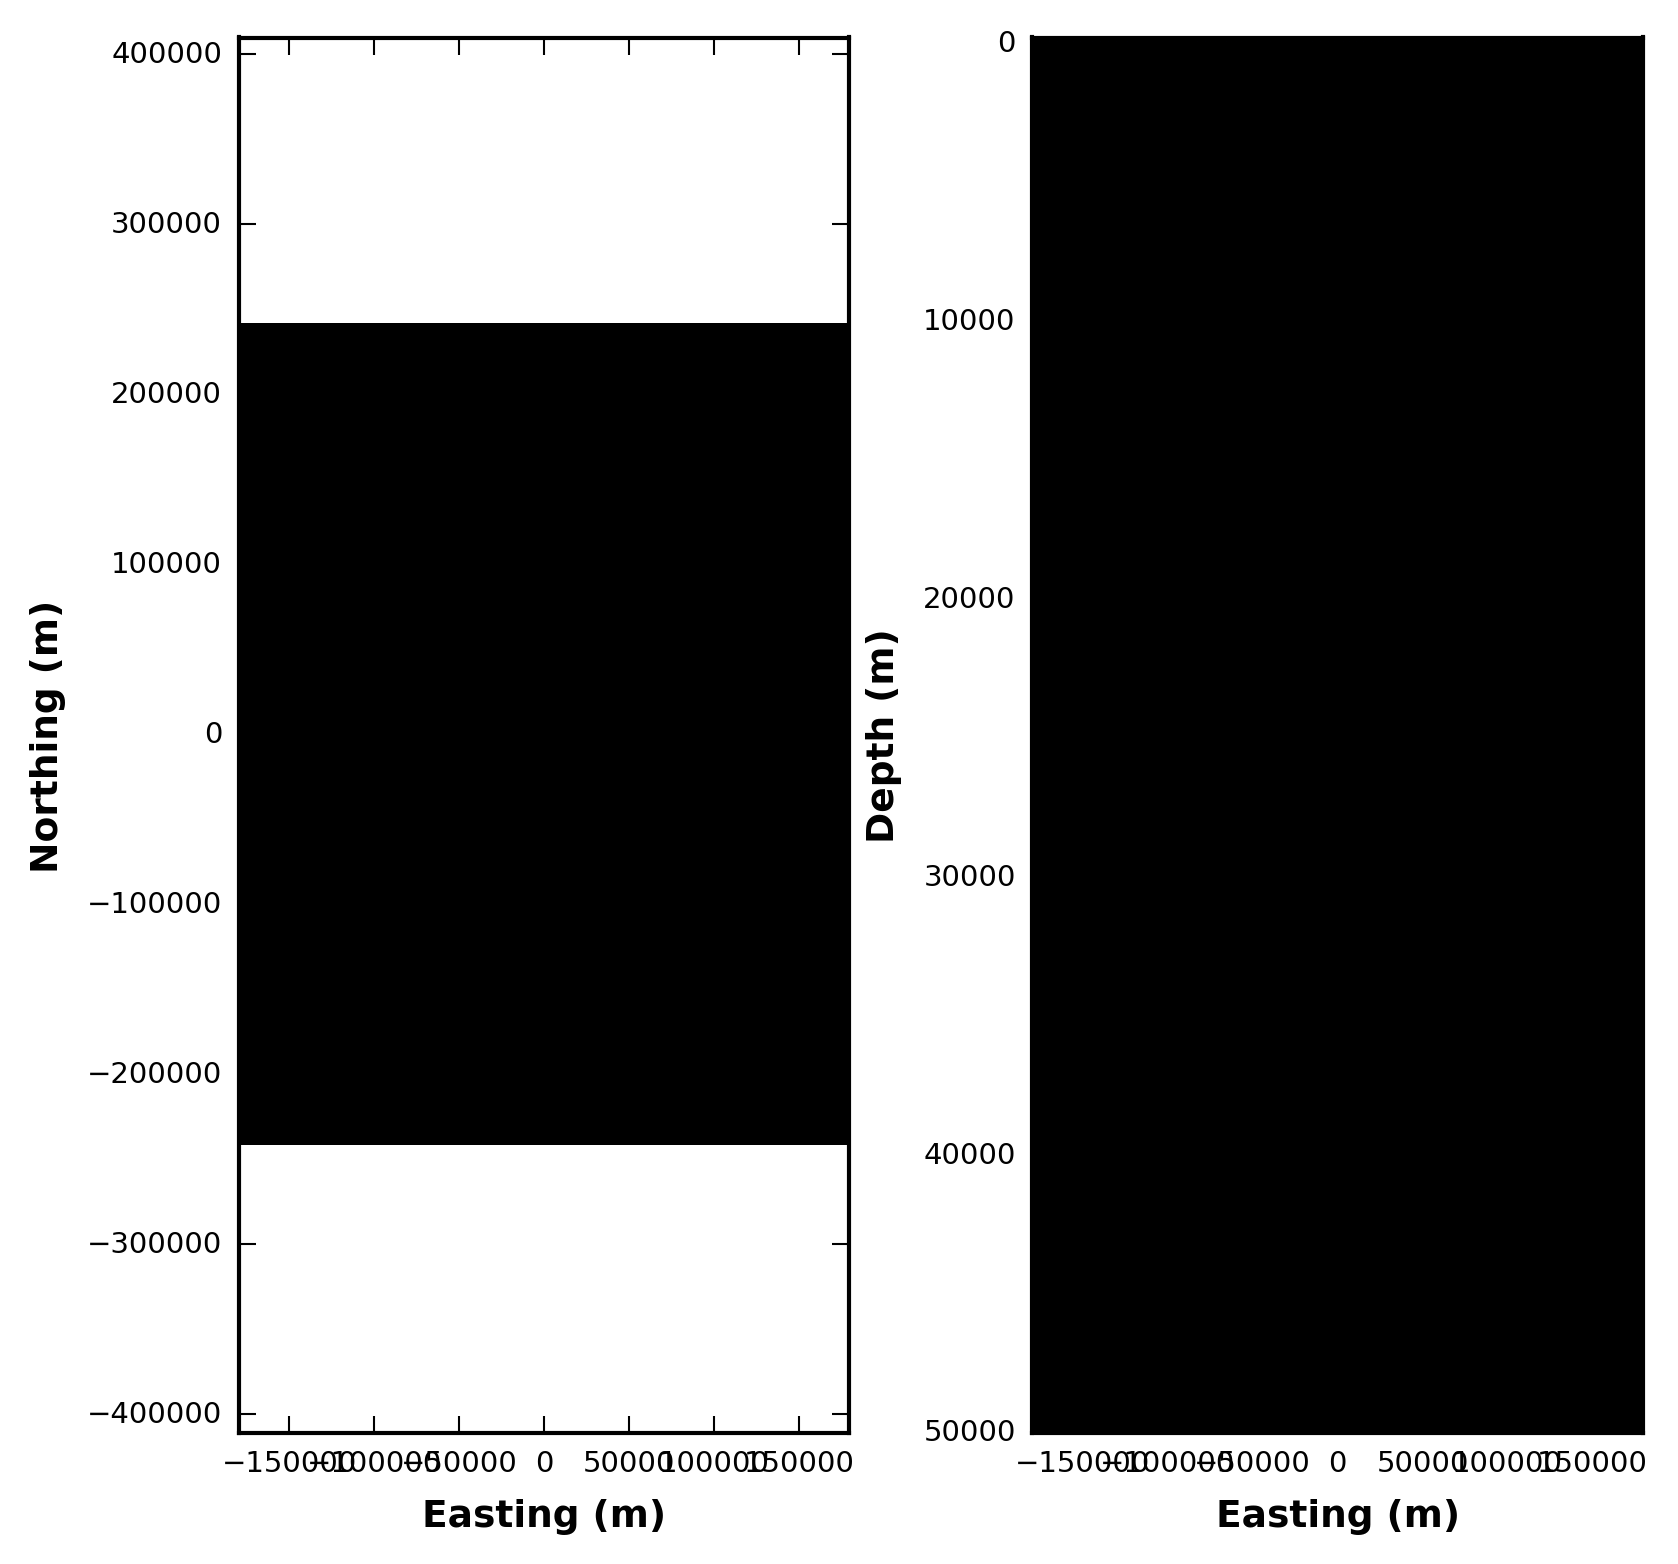

Wrote file to: E:/tmp/modem_inv1\ModEM_Model.ws


In [13]:

#3) make a grid from the stations themselves with 200m cell spacing
mmesh = modem.Model(Data=md, cell_size_east=100,  cell_size_north=200)
mmesh.make_mesh()
# check to see if the mesh is what you think it should be
mmesh.plot_mesh()
# all is good write the mesh file
mmesh.write_model_file(save_path=outdir)

In [2]:
import mtpy

In [1]:
import sys
print (sys.executable)

C:\dev\miniconda2\envs\mtpy\python.exe


In [1]:
from mtpy.core.edi_collection import EdiCollection